## Proyecto: Visualización y análisis de expresión génica y gasto energético tras suplementación con Omega-3
Autora: Melisa Vitale
Curso: Data Science I
Coderhouse Comisión 74235

# Abstract
La presente investigación explora los efectos de la suplementación con ácidos grasos Omega-3 sobre la expresión génica y el gasto energético en reposo (REE), utilizando un dataset sintético basado en el estudio clínico de Nikooyeh et al. (2021). El objetivo fue analizar si la intervención con Omega-3 se asocia con una mayor expresión de los genes PPARγ y UCP2, y si dicha expresión tiene relación con cambios en el metabolismo, medidos como variación del REE. El dataset fue construido extrapolando valores promedio y desviaciones estándar reportadas en el estudio original, simulando 2500 sujetos. Se incluyeron variables clave como el tipo de tratamiento (Omega-3 o placebo), expresión génica de PPARγ y UCP2, estado de activación de los genes, y medidas de REE antes y después del tratamiento. El análisis univariado y bivariado reveló que los sujetos tratados con Omega-3 presentaron mayor proporción de genes activos en comparación con el grupo placebo. Además, en el grupo Omega-3, los individuos con expresión activa de UCP2 mostraron una mayor variación positiva en el gasto energético en reposo, visualizado mediante gráficos tipo violín. Finalmente, se intentó predecir la variación de REE (Delta_REE) utilizando modelos de regresión lineal y Random Forest, aplicando previamente técnicas de selección de variables. También se elaboraron gráficos de comparación entre valores reales y predichos para ambos modelos.

Enlace al estudio original: https://bmcsportsscimedrehabil.biomedcentral.com/articles/10.1186/s13102-021-00266-4
# Hipótesis:
Los sujetos que recibieron suplementación con Omega-3 presentan una mayor expresión de los genes PPARγ y UCP2 en comparación con el grupo placebo.

La expresión activa del gen UCP2 se asocia con una mayor variación positiva del gasto energético en reposo (REE) en el grupo tratado con Omega-3.

In [7]:
import pandas as pd

# URL pública de tu CSV en GitHub
url = "https://raw.githubusercontent.com/MelisaVitale/ProyectoVitaleParteIII/main/Dataset_Definitivo.csv"

# Leer el archivo indicando separador ;
df = pd.read_csv(url, sep=";")

# Ver primeras filas
df.head()

# Reemplazar coma decimal por punto y convertir a float
df["REE dp (kcal/day)"] = df["REE dp (kcal/day)"].str.replace(",", ".").astype(float)
df["REE Antes (kcal/day)"] = df["REE Antes (kcal/day)"].str.replace(",", ".").astype(float)

# calcular Delta_REE
df["Delta_REE"] = df["REE dp (kcal/day)"] - df["REE Antes (kcal/day)"]

df[["REE Antes (kcal/day)", "REE dp (kcal/day)", "Delta_REE"]].head()

# Separar columnas numéricas y categóricas
columnas_numericas = df.select_dtypes(include="number").columns.tolist()
columnas_categoricas = df.select_dtypes(exclude="number").columns.tolist()

print("Columnas numéricas:", columnas_numericas)
print("Columnas categóricas:", columnas_categoricas)




Columnas numéricas: ['Edad', 'Min/Sem Act. Fisica', 'REE Antes (kcal/day)', 'REE dp (kcal/day)', 'Delta_REE']
Columnas categóricas: ['ID', 'Tratamiento', 'Nivel de Actividad Fisica', 'Peso ( kg)', '% Grasa Corporal', 'Grasa corporal en kg', 'Masa libre de grasa en kg', 'PPARg Expresion', 'PPARg Estado', 'UCP2 Expresion', 'UCP2 Estado']


## Gráfico de barras:
Muestra la cantidad de personas con genes activos (PPARγ y UCP2) en función del tratamiento recibido. Se observa que en el grupo Omega-3 hay más individuos con expresión activa de ambos genes que en el grupo Placebo.

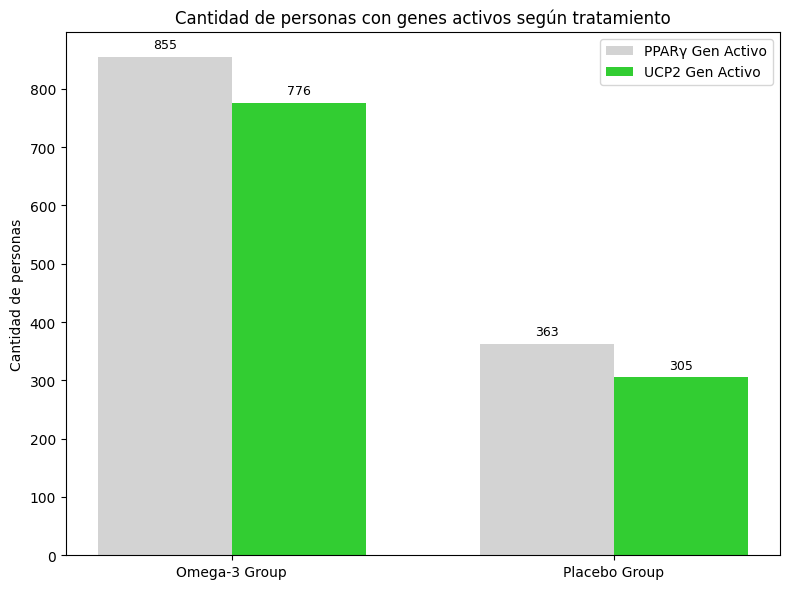

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cargar el dataset actualizado
df = pd.read_excel("https://drive.google.com/uc?export=download&id=1AC30hAWT29DZMAPrkOKt5IMbmdvA0VVS")
# Filtrar por genes activos
pparg_activos = df[df["PPARg Estado"] == "Gen Activo"]["Tratamiento"].value_counts()
ucp2_activos = df[df["UCP2 Estado"] == "Gen Activo"]["Tratamiento"].value_counts()

# Asegurar que existan ambos grupos
tratamientos = ["Omega-3 Group", "Placebo Group"]
pparg_counts = [pparg_activos.get(t, 0) for t in tratamientos]
ucp2_counts = [ucp2_activos.get(t, 0) for t in tratamientos]

# Gráfico
x = np.arange(len(tratamientos))
width = 0.35

plt.figure(figsize=(8, 6))
bar1 = plt.bar(x - width/2, pparg_counts, width, label="PPARγ Gen Activo", color="lightgray")
bar2 = plt.bar(x + width/2, ucp2_counts, width, label="UCP2 Gen Activo", color="limegreen")

# Etiquetas
plt.ylabel("Cantidad de personas")
plt.title("Cantidad de personas con genes activos según tratamiento")
plt.xticks(x, ["Omega-3 Group", "Placebo Group"])
plt.legend()

# Etiquetas de valores sobre las barras
for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 10, f'{int(height)}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


# Gráfico de violín:
Representa la distribución de la variación de REE (en Kcal/día) en el grupo Omega-3, dividida según el estado de expresión del gen UCP2. Se observa que los individuos con gen activo tienen una distribución más centrada en valores positivos de variación del REE.


<ipython-input-16-4d787dfe01df>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


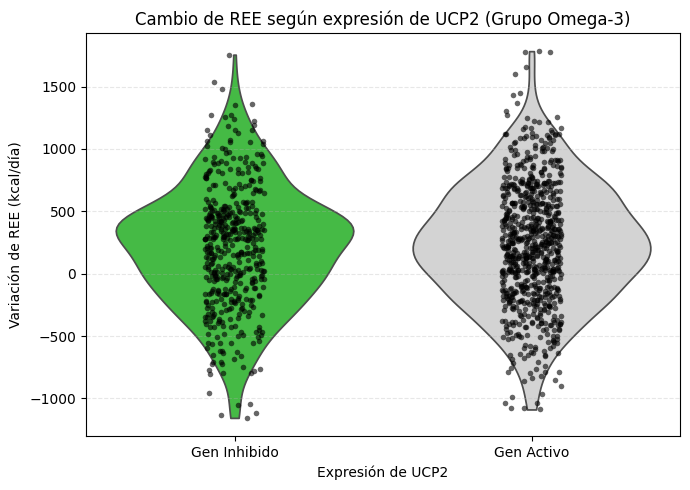

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ────────────────────────────────────────────────────────────────
# 1. Cargar datos
# ────────────────────────────────────────────────────────────────
df = pd.read_excel("https://drive.google.com/uc?export=download&id=1AC30hAWT29DZMAPrkOKt5IMbmdvA0VVS")

# 2. Calcular la variación de REE
df["Delta_REE"] = df["REE dp (kcal/day)"] - df["REE Antes (kcal/day)"]

# 3. Filtrar grupo Omega-3
omega = df[df["Tratamiento"] == "Omega-3 Group"].copy()

# 4. Usar la columna existente que clasifica la expresión
omega["UCP2_estado"] = omega["UCP2 Estado"]      # «Gen Activo» / «Gen Inhibido»

# ────────────────────────────────────────────────────────────────
# 5. Grafico tipo VIOLIN con puntos superpuestos
# ────────────────────────────────────────────────────────────────
plt.figure(figsize=(7, 5))

# Violin (distribución)
sns.violinplot(
    data=omega,
    x="UCP2_estado",
    y="Delta_REE",
    palette=["limegreen", "lightgray"],
    inner=None,        # sin boxplot interno
    cut=0              # no extender más allá de los datos
)

# Stripplot de puntos individuales
sns.stripplot(
    data=omega,
    x="UCP2_estado",
    y="Delta_REE",
    color="black",
    alpha=0.6,
    size=4,
    jitter=True
)

# Etiquetas y estilo
plt.title("Cambio de REE según expresión de UCP2 (Grupo Omega-3)")
plt.xlabel("Expresión de UCP2")
plt.ylabel("Variación de REE (kcal/día)")
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


##  Selección de variables predictoras (Reducción de dimensionalidad)

Se eligieron las 4 variables más relevantes para predecir la variación del REE usando SelectKBest y f_regression.



In [9]:
from sklearn.feature_selection import SelectKBest, f_regression

# 1. Variables predictoras (X) y variable objetivo (y)
X = df[[
    "Edad",
    "Min/Sem Act. Fisica",
    "Peso ( kg)",
    "% Grasa Corporal",
    "PPARg Expresion",
    "UCP2 Expresion"
]].copy()

# Reemplazar coma decimal por punto y convertir a float
for col in X.columns:
    X[col] = X[col].astype(str).str.replace(",", ".").astype(float)

# Variable objetivo
y = df["Delta_REE"].astype(str).str.replace(",", ".").astype(float)

# 2. Aplicar SelectKBest con f_regression
selector = SelectKBest(score_func=f_regression, k=4)  # Seleccionar 4 variables
X_selected = selector.fit_transform(X, y)

# 3. Mostrar las variables seleccionadas
columnas_seleccionadas = X.columns[selector.get_support()]
print("✅ Columnas seleccionadas para predecir Delta_REE:")
print(columnas_seleccionadas)



✅ Columnas seleccionadas para predecir Delta_REE:
Index(['Edad', '% Grasa Corporal', 'PPARg Expresion', 'UCP2 Expresion'], dtype='object')


## Regresión lineal:
Se entrenó un modelo de regresión lineal con las variables seleccionadas para predecir Delta_REE y evaluar su rendimiento.

In [12]:
columnas_seleccionadas = ['Edad', '% Grasa Corporal', 'PPARg Expresion', 'UCP2 Expresion']

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 1. Filtrar las columnas seleccionadas
X_modelo = X[columnas_seleccionadas]
y_modelo = y

# 2. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_modelo, y_modelo, test_size=0.2, random_state=42)

# 3. Entrenar modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# 4. Predecir
y_pred = modelo.predict(X_test)


In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)


MAE: 406.5666149845357
RMSE: 511.8485702748629
R²: 0.004174485302070874


## Regresión lineal Grafico

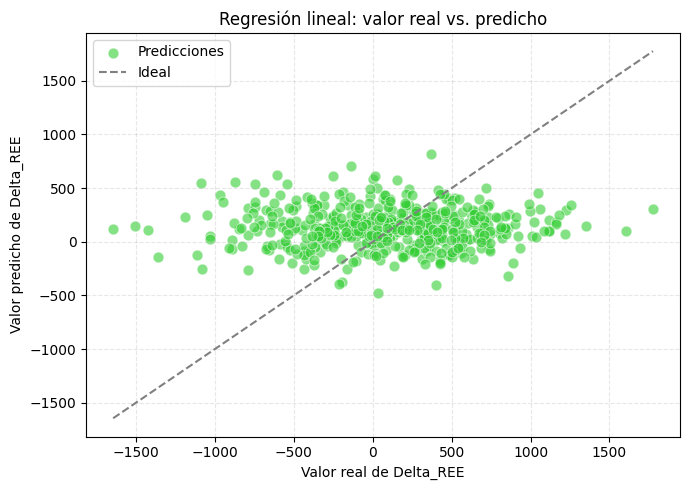

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear gráfico de dispersión
plt.figure(figsize=(7, 5))

# Puntos reales vs predichos (verde suave)
sns.scatterplot(x=y_test, y=y_pred, color="limegreen", alpha=0.6, s=60, label="Predicciones")

# Línea ideal (gris) - línea de referencia perfecta
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="gray", linestyle="--", label="Ideal")

# Etiquetas y estilo
plt.xlabel("Valor real de Delta_REE")
plt.ylabel("Valor predicho de Delta_REE")
plt.title("Regresión lineal: valor real vs. predicho")
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()



## Random Forest:  
Se entrenó un modelo que combina varios árboles de decisión para predecir la variación del REE, capturando posibles relaciones no lineales entre las variables seleccionadas.

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X_modelo, y_modelo, test_size=0.2, random_state=42)

# Entrenar modelo
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

# Predecir
y_pred = modelo_rf.predict(X_test)

# Evaluar
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)


MAE: 429.539448
RMSE: 543.4239288408121
R²: -0.12247784118600036


## Random Forest Grafico

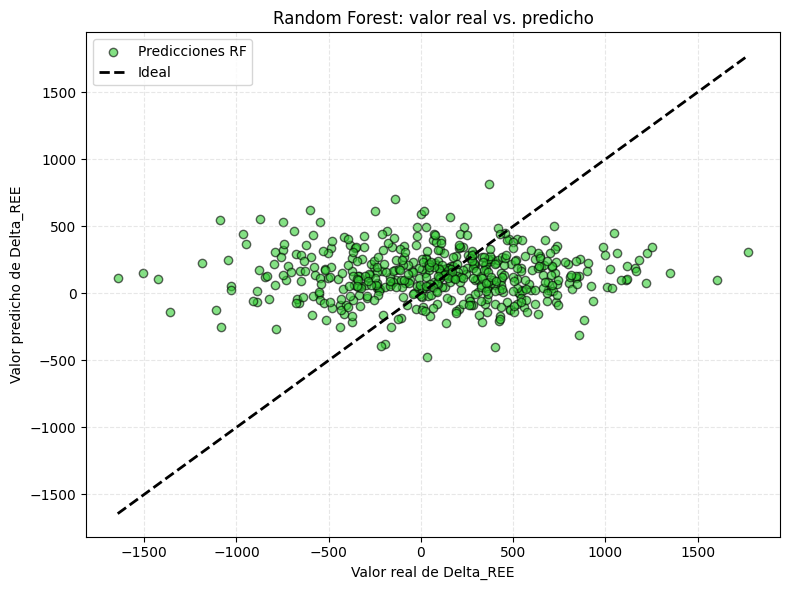

In [19]:
import matplotlib.pyplot as plt

# Crear gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color="limegreen", label="Predicciones RF", edgecolors='k')

# Línea ideal
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Ideal")

# Estética
plt.title("Random Forest: valor real vs. predicho")
plt.xlabel("Valor real de Delta_REE")
plt.ylabel("Valor predicho de Delta_REE")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


# Conclusión:
Los resultados del presente análisis permiten evaluar parcialmente las hipótesis planteadas respecto al impacto de la suplementación con ácidos grasos Omega-3 sobre la expresión génica y el metabolismo energético. En línea con estudios previos, se observó que los sujetos que recibieron Omega-3 presentaron una mayor proporción de expresión activa de los genes PPARγ y UCP2 en comparación con el grupo placebo. Además, en el grupo Omega-3, aquellos individuos con UCP2 activo tendieron a mostrar una mayor variación positiva del gasto energético en reposo (Delta_REE), lo cual apoya la segunda hipótesis.

Sin embargo, los modelos predictivos utilizados para estimar la variación del REE a partir de variables fisiológicas y genéticas no lograron un buen rendimiento. El modelo de regresión lineal arrojó un error absoluto medio (MAE) de 406.57, un RMSE de 511.85, y un coeficiente de determinación R² ≈ 0.0001, indicando una capacidad explicativa prácticamente nula.

Por su parte, el modelo Random Forest Regressor, aunque más robusto ante relaciones no lineales, tampoco mejoró significativamente el rendimiento: obtuvo un MAE de 429.54, un RMSE de 543.42, y un valor de R² negativo (-0.12), lo que sugiere que el modelo es menos útil que una simple media constante.

Estas limitaciones pueden atribuirse a:

-La naturaleza sintética del dataset, que aunque útil para simulación, no contiene toda la complejidad biológica real.

-La ausencia de variables fisiológicas clave, como estado nutricional, actividad hormonal, genética individual, entre otras.

-Relaciones no lineales o interacciones complejas que no fueron completamente capturadas por los modelos aplicados.

En conclusión, si bien se observaron asociaciones descriptivas relevantes entre tratamiento y expresión génica, y entre la activación de UCP2 y el metabolismo, los modelos predictivos presentaron un rendimiento limitado. Este análisis proporciona una base útil para futuras investigaciones más complejas, que podrán incorporar mayor variedad de variables y técnicas de modelado avanzadas.
